In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import rootutils
root = rootutils.setup_root("./scripts/", dotenv=True, pythonpath=True,  indicator =  [".project-root"], cwd = True)


from scripts.models import CustomGNN
from scripts.environment import Environment
from scripts.utils import prune, get_quality, show_graph
from scripts.utils import find_most_optimal_permutations, implement_permutation

In [3]:

# load the data

positions = []
data = []
for i in range(10):
    positions.append(np.load(f"positions/random_{i}_positions.npy"))
    SMAD_ERK = np.load(f"positions/random_{i}_SMAD_and_ERK.npy")
    SMAD_ERK = SMAD_ERK.swapaxes(1, 2)

    # SMAD_ERK[:,:,0] *= 100.
    # SMAD_ERK[:,:,1] *= 100.

    d = SMAD_ERK[:101,:,:]
    data.append(d)

(1000, 9) (1000, 9)


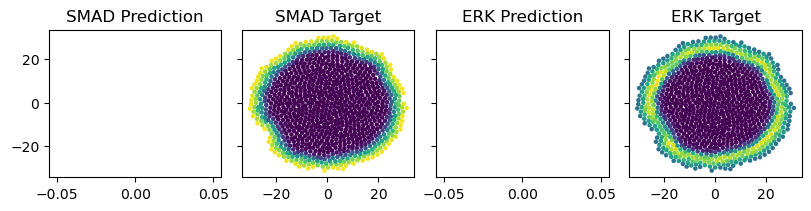

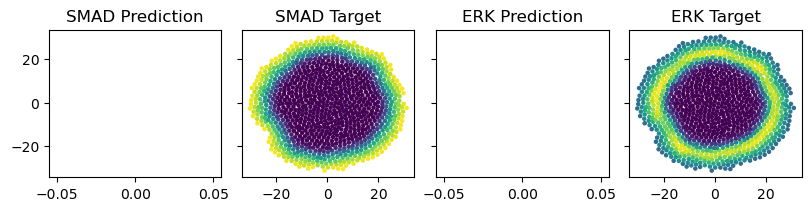

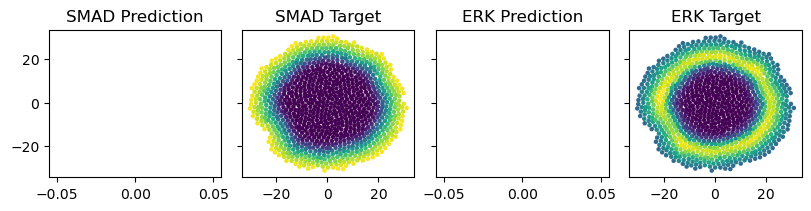

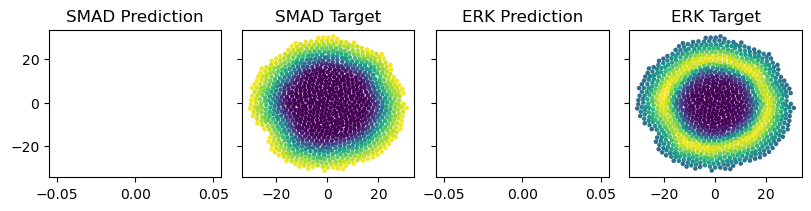

QUALITY before nan
(1000, 9) (1000, 9)


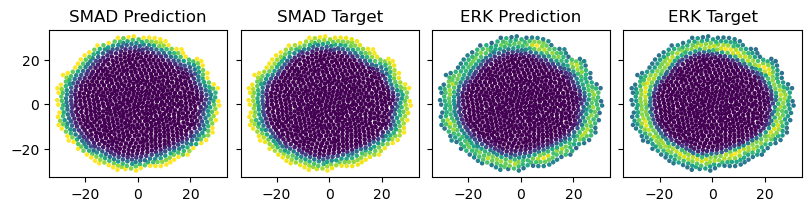

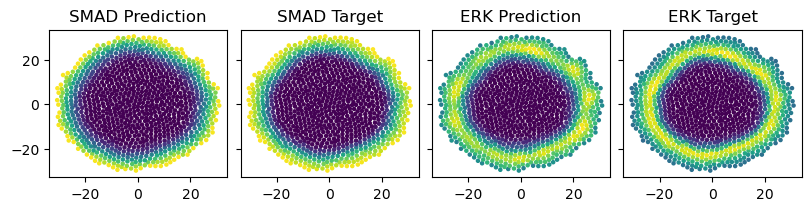

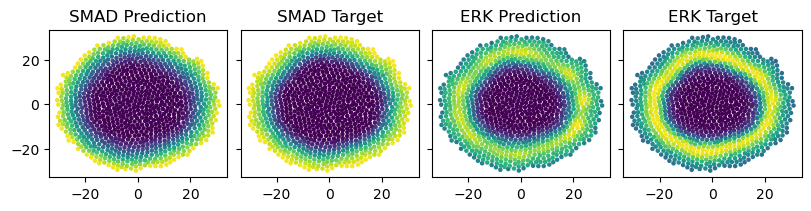

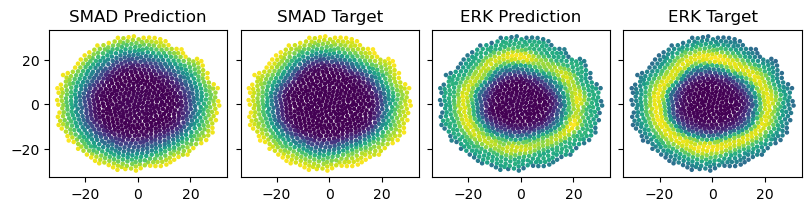

QUALITY before 4.11183208186226
(1000, 9) (1000, 9)


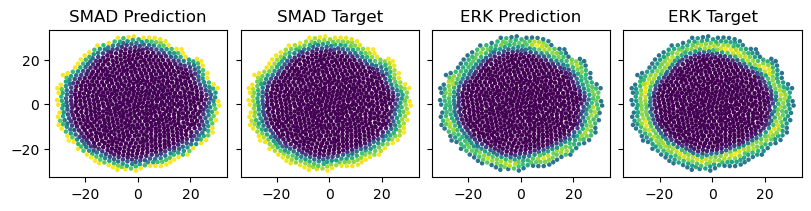

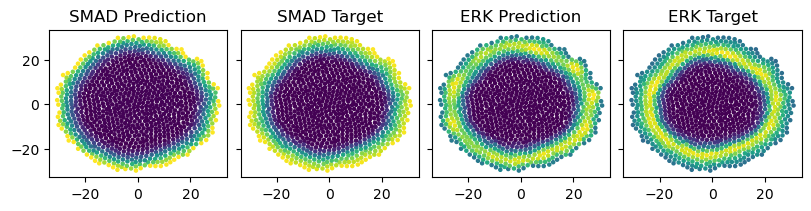

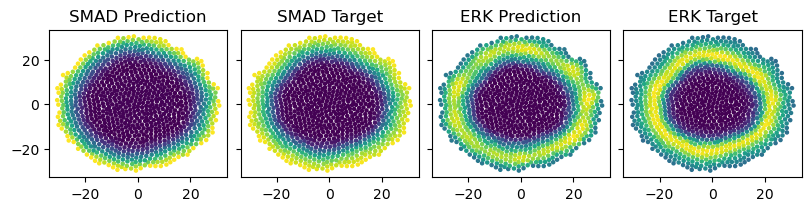

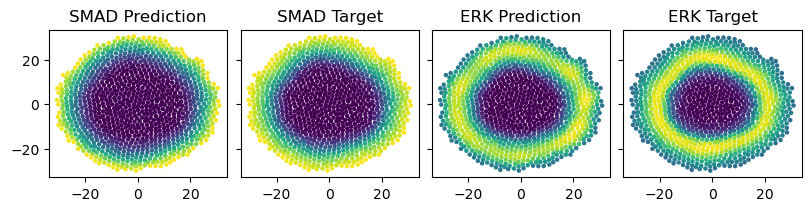

QUALITY before 4.706914970557521
(1000, 9) (1000, 9)


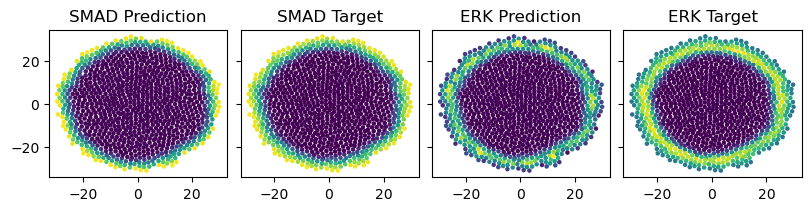

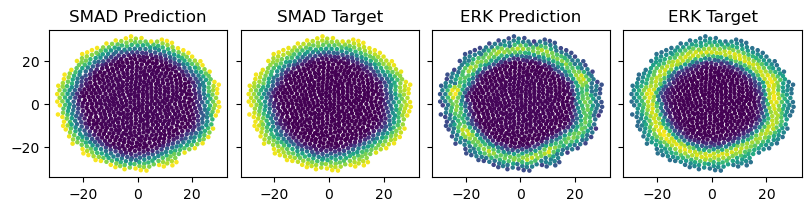

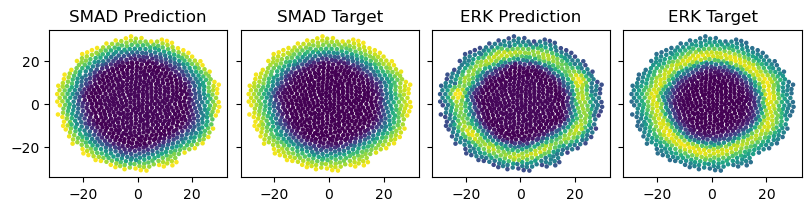

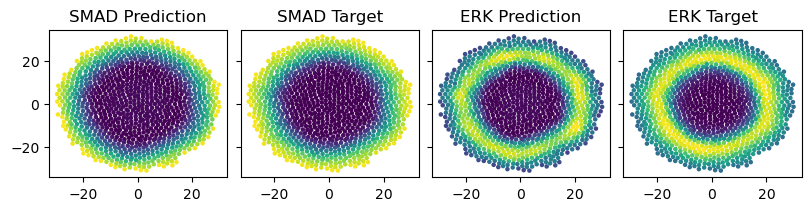

QUALITY before 3.958759626894288
(1000, 9) (1000, 9)


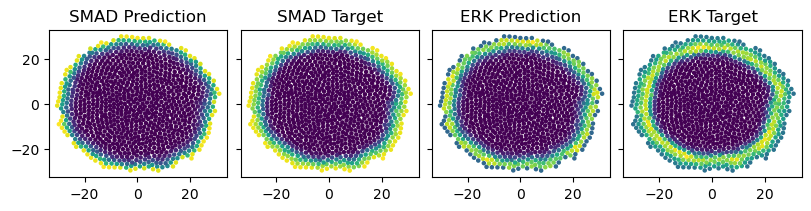

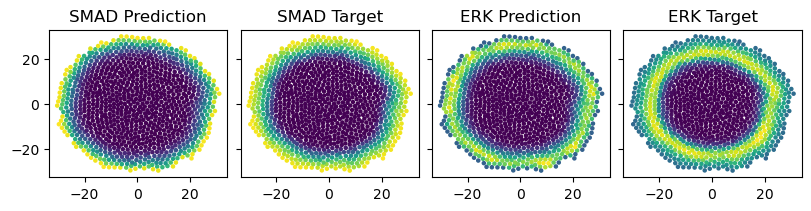

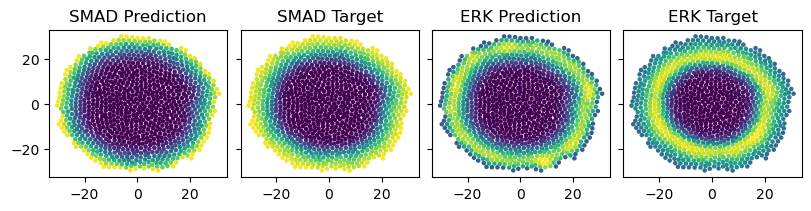

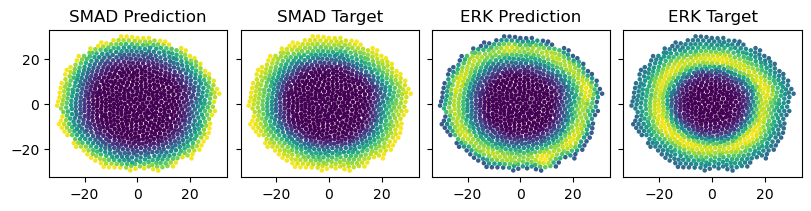

In [ ]:
for i in range(10):
    # load the model
    stepsize = 2

    path = f"models/model50{i}.pth"
    model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(path))
    model.eval()


    qualb = get_quality(model, data, positions, stepsize, 4)
    print("QUALITY before", qualb)
# mask = prune(model, threshold = 0.01)
# w = model.get_weights()
# ww = [w.detach().numpy()*(~m) for w,m in zip(w, mask)]
# ww = [torch.nn.Parameter(torch.tensor(w)) for w in ww]
# model.set_weights(ww) 

# quala = get_quality(model, data, positions, stepsize, 4)
# print("QUALITY before", qualb)
# print("QUALITY after", quala)

(1000, 9) (1000, 9)


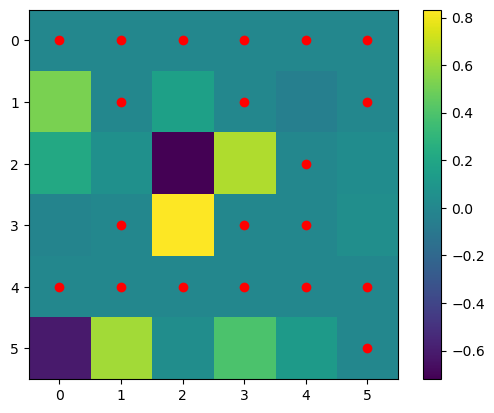

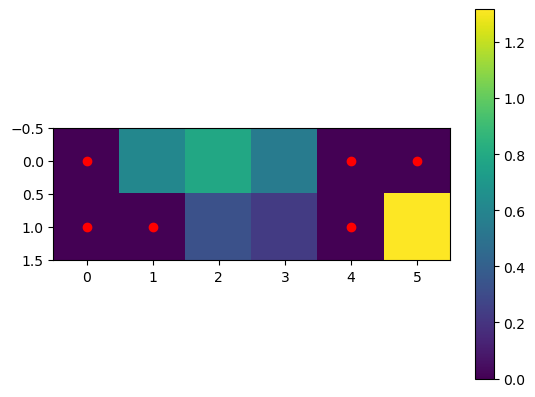

(1000, 9) (1000, 9)


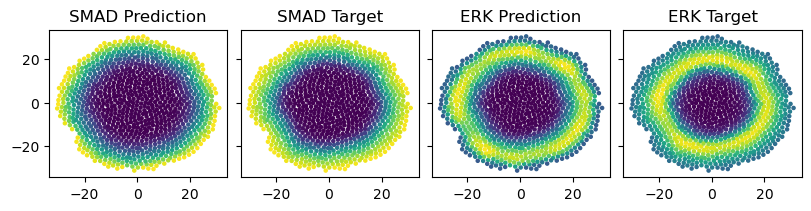

QUALITY before 5.13179594056433
QUALITY after 5.085751767774641
N-pruned 26
(1000, 9) (1000, 9)


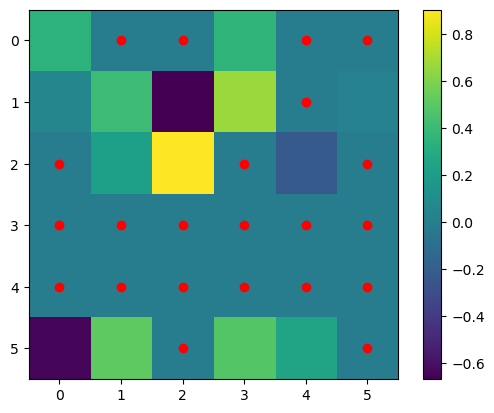

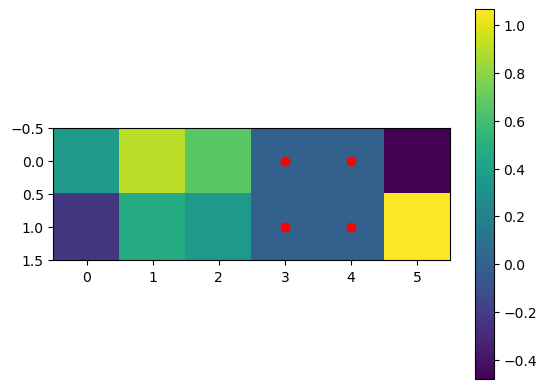

(1000, 9) (1000, 9)


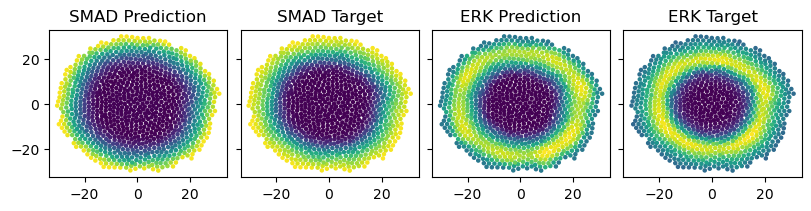

QUALITY before 4.703298721812069
QUALITY after 4.644955593399757
N-pruned 26
(1000, 9) (1000, 9)


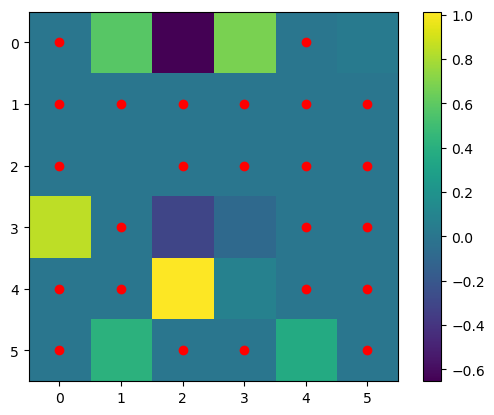

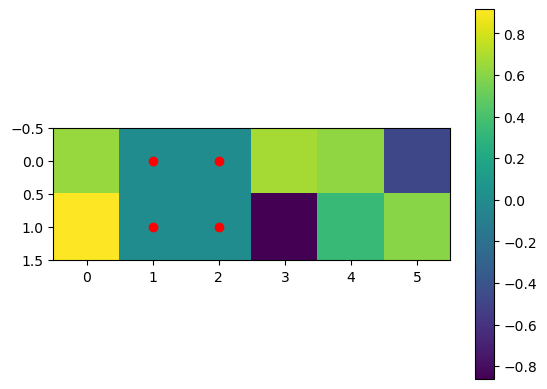

(1000, 9) (1000, 9)


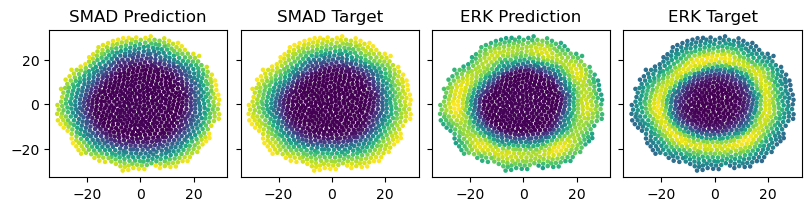

QUALITY before 6.493457748653266
QUALITY after 6.2984799726289555
N-pruned 28
(1000, 8) (1000, 8)


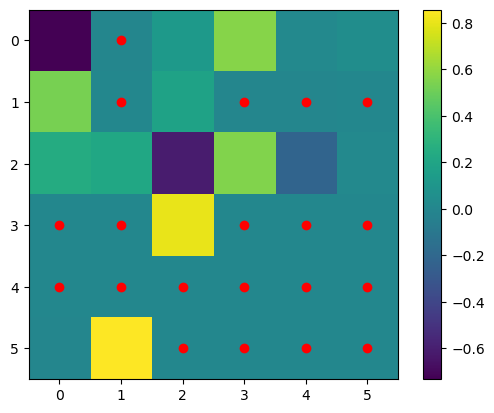

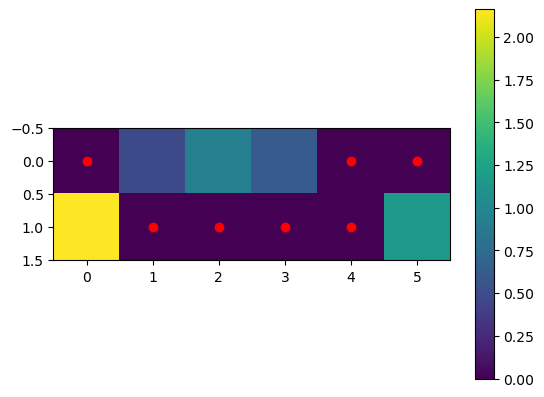

(1000, 8) (1000, 8)


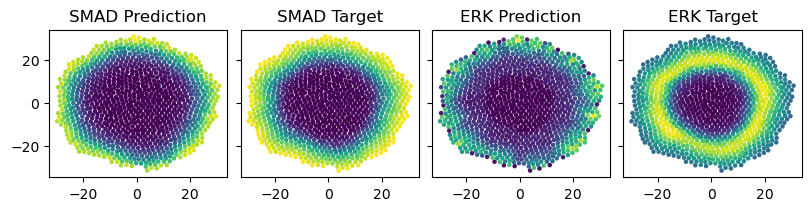

QUALITY before 6.84547674121499
QUALITY after 6.719233188597706
N-pruned 27
(1000, 9) (1000, 9)


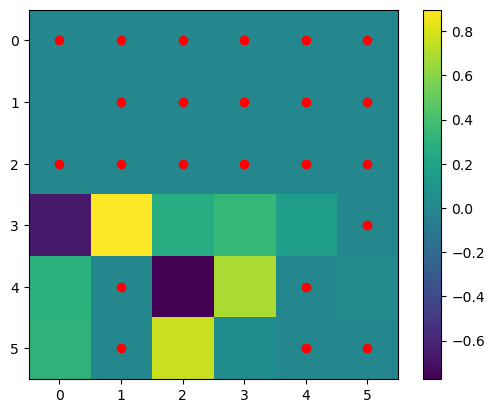

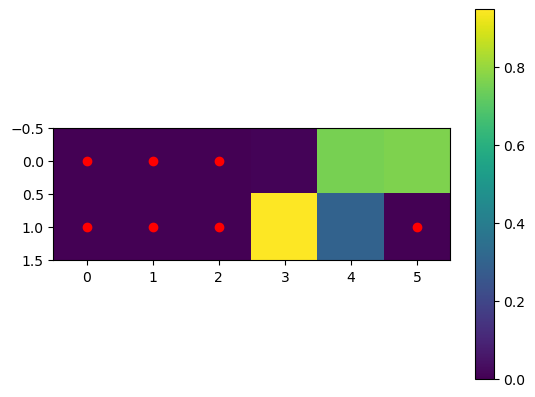

(1000, 9) (1000, 9)


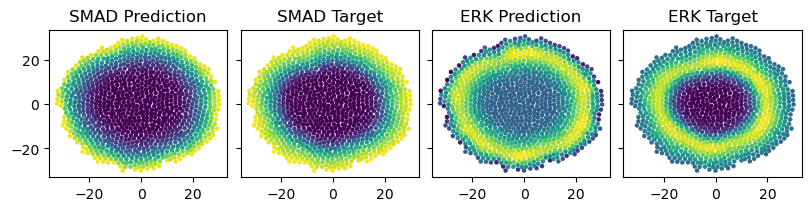

QUALITY before 6.484535136013692
QUALITY after 6.3963028251446294
N-pruned 30
(1000, 9) (1000, 9)


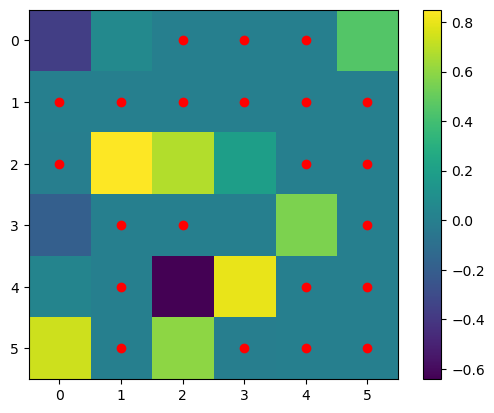

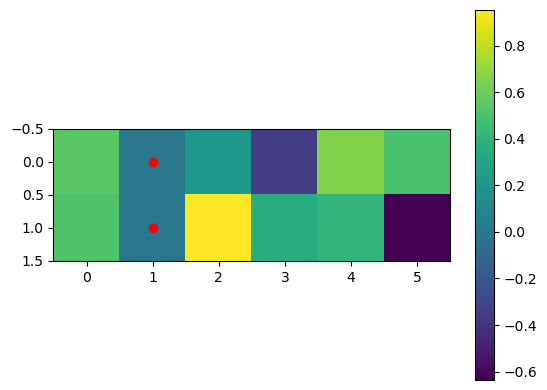

(1000, 9) (1000, 9)


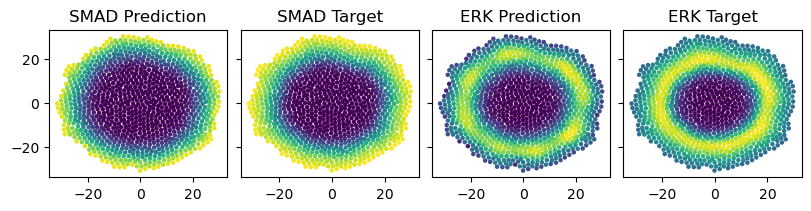

QUALITY before 5.523160578464436
QUALITY after 5.231777965359399
N-pruned 24
(1000, 8) (1000, 8)


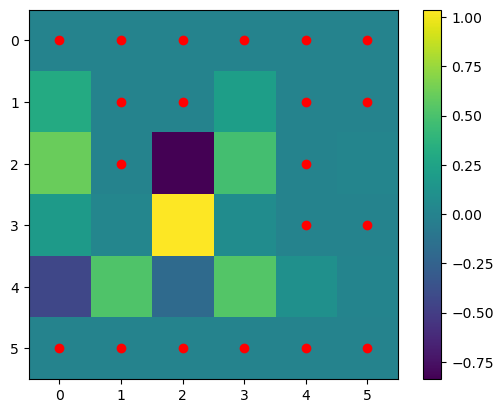

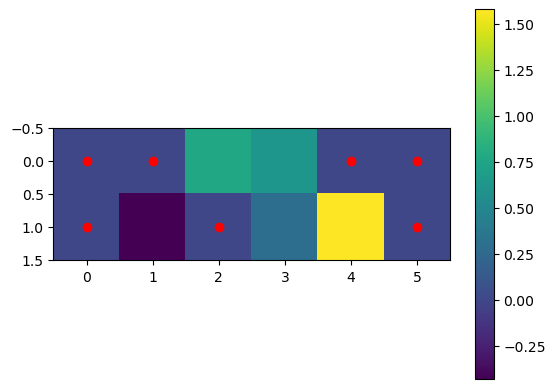

(1000, 9) (1000, 9)


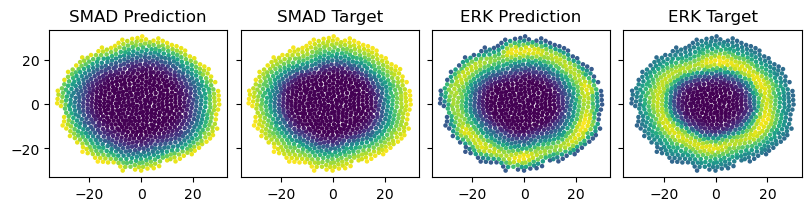

QUALITY before 6.400222443065645
QUALITY after 6.286210502002667
N-pruned 27
(1000, 9) (1000, 9)


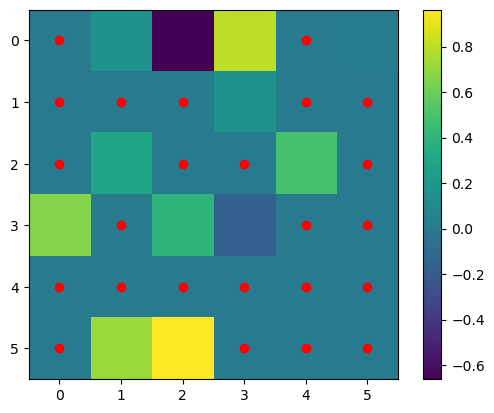

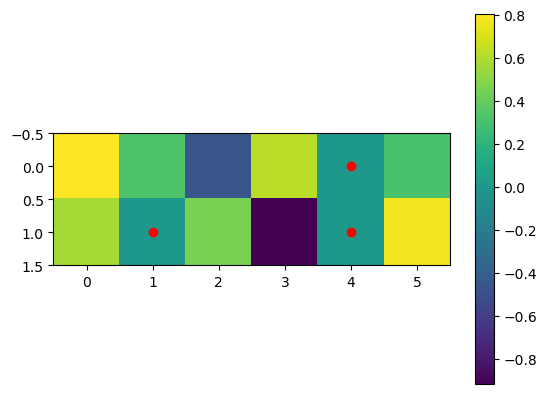

(1000, 9) (1000, 9)


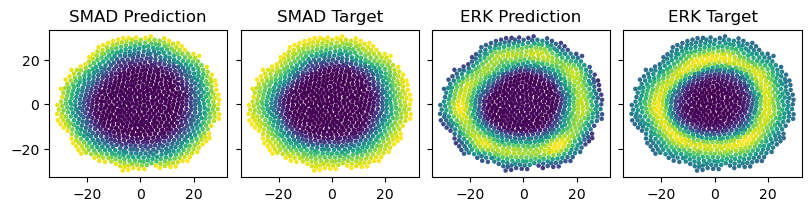

QUALITY before 4.553939270982932
QUALITY after 4.554343343817994
N-pruned 27
(1000, 9) (1000, 9)


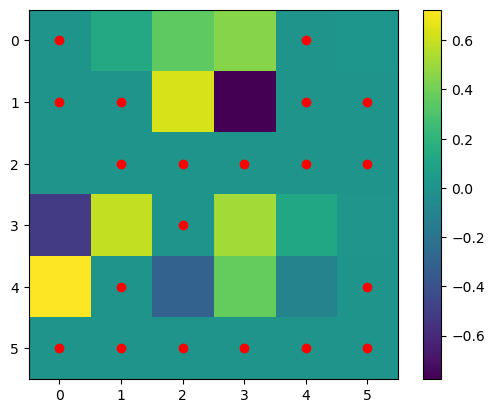

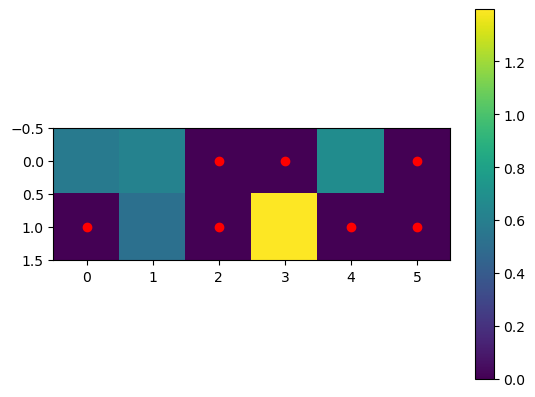

(1000, 9) (1000, 9)


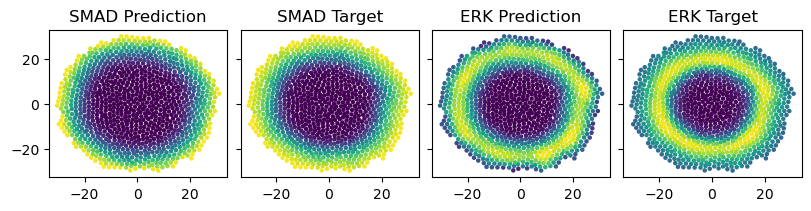

QUALITY before 5.661819219914863
QUALITY after 5.6233677562886815
N-pruned 27
(1000, 9) (1000, 9)


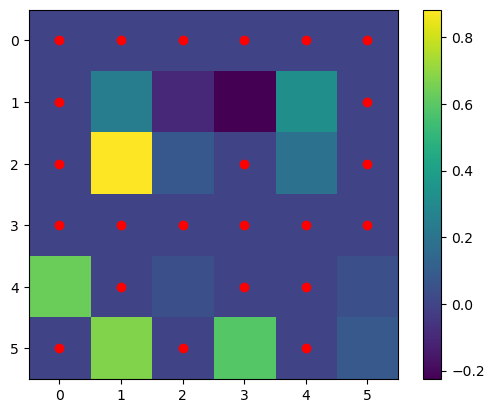

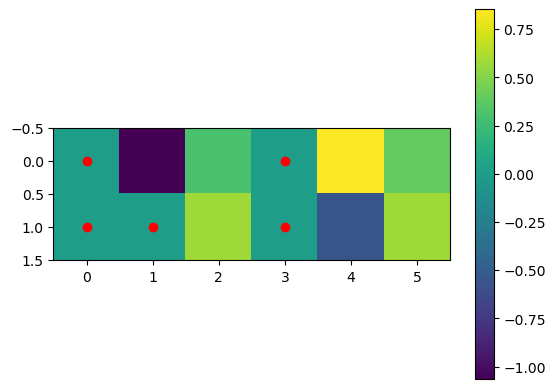

(1000, 9) (1000, 9)


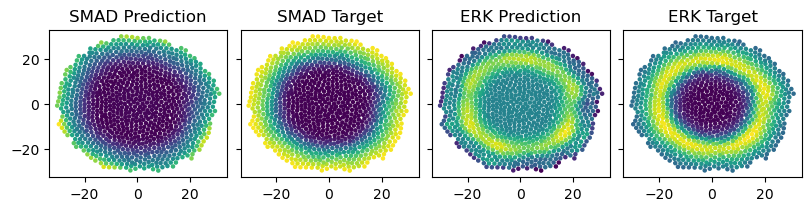

QUALITY before 10.689428710133493
QUALITY after 10.621162430238167
N-pruned 28


In [ ]:

scores = []
pruned_scores = []
masks = []
for i in range(10):
    # load the model
    stepsize = 2

    path = f"models/model60{i}.pth"
    model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(path))
    model.eval()



    qualb = get_quality(model, data, positions, stepsize, 0)
    scores.append(qualb)
    mask = prune(model, threshold = 0.01)
    masks.append(mask)
    w = model.get_weights()
    ww = [w.detach().numpy()*(~m) for w,m in zip(w, mask)]
    ww = [torch.nn.Parameter(torch.tensor(w)) for w in ww]
    model.set_weights(ww) 

    quala = get_quality(model, data, positions, stepsize, 1)
    pruned_scores.append(quala)
    print("QUALITY before", qualb)
    print("QUALITY after", quala)
    print("N-pruned", np.sum([np.sum(m) for m in mask]))

scores = np.array(scores)
pruned_scores = np.array(pruned_scores)


In [5]:
(scores - pruned_scores)

NameError: name 'scores' is not defined

Most perform better after pruning!

In [ ]:

all_weights = []


for i in range(10):
    # load the model
    stepsize = 5

    path = f"model40{i}.pth"
    model = CustomGNN(3, [6], 2, aggregation="mean", biases = False)
    model.load_state_dict(torch.load(path))
    model.eval()

    weights = model.get_weights()
    ww = [w.detach().numpy() for w in weights]
    all_weights.append(ww)

    sign_weights = signify_weights(ww, masks[i])



In [65]:
all_permutationss = find_most_optimal_permutations(all_weights, masks, signed = True)
all_permutations = find_most_optimal_permutations(all_weights, masks, signed = False)

In [71]:
ii = 3
print(all_permutationss[ii])
print(all_permutations[ii])

[4, 3, 2, 1, 5, 0]
[1, 4, 3, 5, 0, 2]


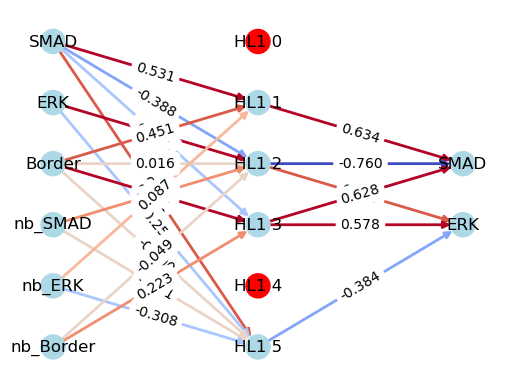

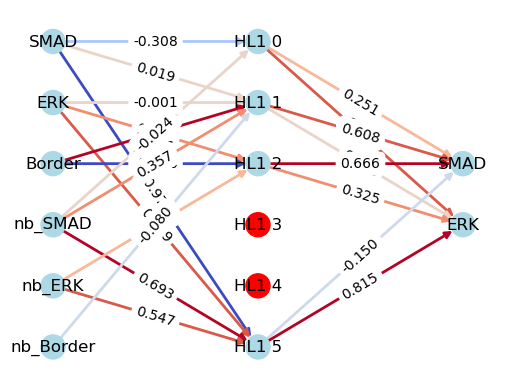

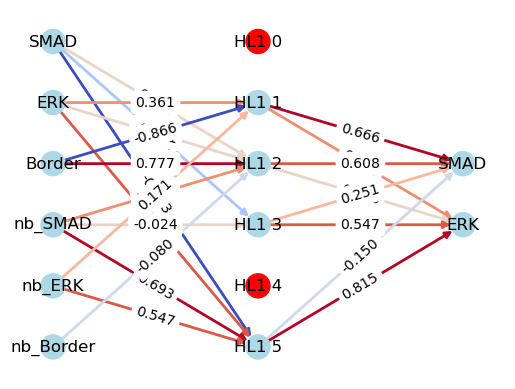

In [ ]:
iii = 1
show_graph(all_weights[0], masks[0] )
show_graph(all_weights[iii], masks[iii] )
ws, msk = implement_permutation(all_weights[iii], masks[iii], all_permutationss[iii])
show_graph(ws, msk )

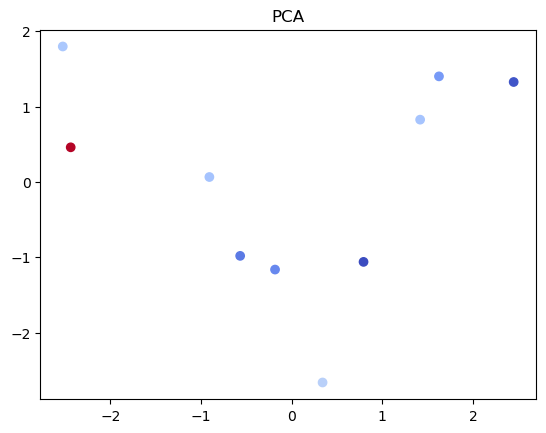

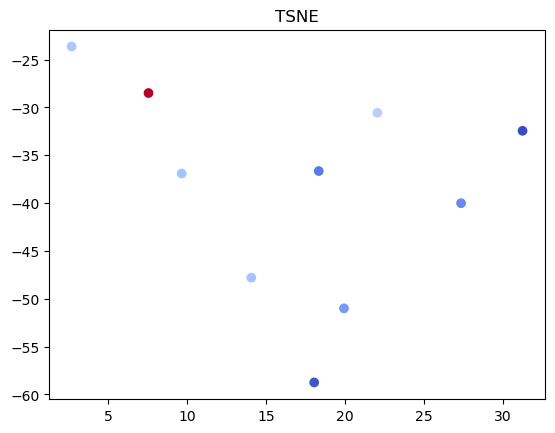

In [73]:
# import a library that can do dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# reduce the dimensionality of the weights
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity = 5)

reduced_weights = pca.fit_transform(np.array(final_weights).reshape(10, -1))
reduced_weights_tsne = tsne.fit_transform(np.array(final_weights).reshape(10, -1),)

# plot the reduced weights
plt.scatter(reduced_weights[:,0], reduced_weights[:,1], c = scores, cmap="coolwarm")
plt.title("PCA")
plt.show()

plt.scatter(reduced_weights_tsne[:,0], reduced_weights_tsne[:,1], c = scores, cmap="coolwarm")
plt.title("TSNE")
plt.show()
